<a href="https://colab.research.google.com/github/CamoinLancelot/Database-INHA/blob/main/week11lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3 as sl
con = sl.connect('my-test.db')

In [2]:
with con:
  con.execute("""
      CREATE TABLE USER ( id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
      name TEXT,
      age INTEGER
      );
  """)

In [3]:
sql = 'INSERT INTO USER (id, name,age) values (?,?,?)'
data = [
    (1,'Alice',21),
    (2,'Bob',22),
    (3,'Chris',23)
]

In [4]:
with con:
  con.executemany(sql, data)

In [5]:
with con:
  data=con.execute("SELECT * FROM USER WHERE age <= 22")
  for row in data:
    print(row)

(1, 'Alice', 21)
(2, 'Bob', 22)


In [8]:
import pandas as pd
df_skill = pd.DataFrame({
    'user_id':[1,1,2,2,3,3,3],
    'skill':['Network Security','Algorithm Dedvelopment','Network Security','Java','Python','Data Science','Machine Learning']
})
df_skill

,user_id,skill
0,1,Network Security
1,1,Algorithm Dedvelopment
2,2,Network Security
3,2,Java
4,3,Python
5,3,Data Science
6,3,Machine Learning


In [9]:
df_skill.to_sql('SKILL',con)
df=pd.read_sql('''
      SElECT s.user_id, u.name ,u.age, s.skill
      FROM USER u LEFT JOIN SKILL s ON u.id = s.user_id''',con)
df

,user_id,age,skill
0,1,21,Algorithm Dedvelopment
1,1,21,Network Security
2,2,22,Java
3,2,22,Network Security
4,3,23,Data Science
5,3,23,Machine Learning
6,3,23,Python


In [12]:
df.to_sql('USER_SKILL', con)

In [13]:
%load_ext sql
from random import uniform,choice
import time
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

In [14]:
%sql sqlite:////demo.db3

'Connected: @/demo.db3'

In [15]:
%sql SELECT date('now');

 * sqlite:////demo.db3
Done.


date('now')
2022-11-09


In [16]:
%sql SELECT date('now','start of month','+1 month','-1 day');

 * sqlite:////demo.db3
Done.


"date('now','start of month','+1 month','-1 day')"
2022-11-30


In [17]:
%%sql sqlite://
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL)

Done.
Done.


[]

In [18]:
%%sql sqlite://
CREATE UNIQUE INDEX idx_timestamp ON Temperature (Timestamp)

Done.


[]

In [ ]:
def dt(days):
  return timedelta(days=days)
N_rows = 500
now = datetime.now()
for i in range(N_rows):
  timestamp = now - dt(days=(N_rows - i))
  temperature = uniform (18,26)
  %sql INSERT INTO Temperature VALUES (:timestamp, :temperature);

In [22]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5

 * sqlite:////demo.db3
Done.


Date,Temperature
2021-06-27 09:15:55,18.48864814809301
2021-06-28 09:15:55,21.493190909800838
2021-06-29 09:15:55,25.204547505759237
2021-06-30 09:15:55,25.112553030822458
2021-07-01 09:15:55,23.049427315857802


In [ ]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE Date <='2022-06-31 14:21:45'

In [ ]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE CAST(strftime('%Y',Date)as Int)=2021

In [27]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year,
       AVG(Temperature) AS MEAN_TMP,
       MAX(Temperature) AS MAX_TMP,
       MIN(Temperature) AS MIN_TMP
FROM temperature
GROUP BY strftime ('%Y', Timestamp)

Done.


Year,MEAN_TMP,MAX_TMP,MIN_TMP
2021,21.832274237754902,25.974286183754074,18.0069286025657
2022,22.0827057260951,25.96874923721994,18.006869838964803


In [28]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM temperature
df = ts.DataFrame()
df.set_index("date",inplace = True)
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:////demo.db3
Done.


DatetimeIndex(['2021-06-27 09:15:55', '2021-06-28 09:15:55',
               '2021-06-29 09:15:55', '2021-06-30 09:15:55',
               '2021-07-01 09:15:55', '2021-07-02 09:15:55',
               '2021-07-03 09:15:55', '2021-07-04 09:15:55',
               '2021-07-05 09:15:55', '2021-07-06 09:15:55',
               ...
               '2022-10-30 09:15:55', '2022-10-31 09:15:55',
               '2022-11-01 09:15:55', '2022-11-02 09:15:55',
               '2022-11-03 09:15:55', '2022-11-04 09:15:55',
               '2022-11-05 09:15:55', '2022-11-06 09:15:55',
               '2022-11-07 09:15:55', '2022-11-08 09:15:55'],
              dtype='datetime64[ns]', name='date', length=500, freq=None)

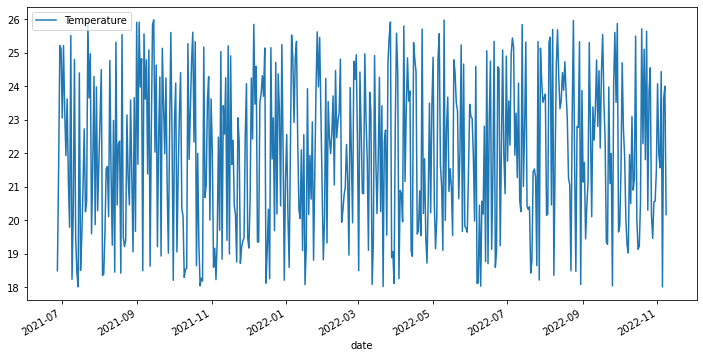

In [29]:
df.plot(figsize=(12,6))